In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', remove=['headers', 'footers', 'quotes'])
newsgroups_test = fetch_20newsgroups(subset='test', remove=['headers', 'footers', 'quotes'])
X_train, y_train = newsgroups_train.data, newsgroups_train.target
X_test, y_test = newsgroups_test.data, newsgroups_test.target

print("vectorizing")
vectorizer = TfidfVectorizer(min_df=5, norm='l2').fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

vectorizing


2076


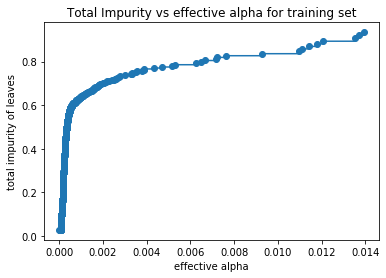

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

criterion = 'gini'

clf = DecisionTreeClassifier(random_state=0, criterion=criterion)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(len(ccp_alphas))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

clfs = []
for i in range (0, len(ccp_alphas), 200):
    print("Fitting ccp_alpha = ", ccp_alphas[i])
    ccp_alpha = ccp_alphas[i]
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion=criterion)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Done fitting to all ccp_alphas")

Fitting ccp_alpha =  0.0
Fitting ccp_alpha =  8.838607035531201e-05
Fitting ccp_alpha =  8.838607035531201e-05
Fitting ccp_alpha =  0.000132579105532968
Fitting ccp_alpha =  0.00014141771256849918
Fitting ccp_alpha =  0.00015909492663956166
Fitting ccp_alpha =  0.00017677214071062401
Fitting ccp_alpha =  0.0002142810334633788
Fitting ccp_alpha =  0.0002607460239789556
Fitting ccp_alpha =  0.00034658875909313047
Fitting ccp_alpha =  0.001101137655585633
Done fitting to all ccp_alphas


ValueError: ignored

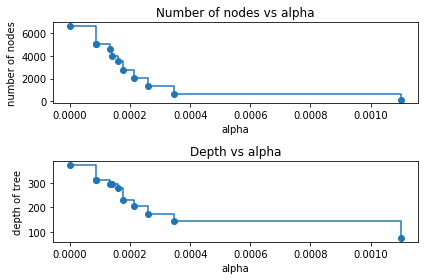

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
ccp_alphas = ccp_alphas[::200]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

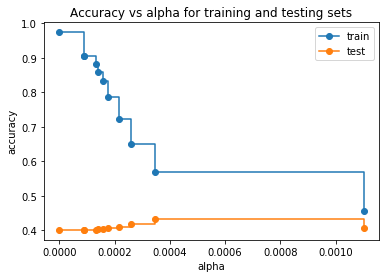

In [0]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [0]:
clfspec = []
spacing = [0.0004, 0.0006, 0.0008, 0.001]
for i in spacing:
    print("Fitting ccp_alpha = ", i)
    ccp_alpha = i
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion=criterion)
    clf.fit(X_train, y_train)
    clfspec.append(clf)
print("Done fitting to all ccp_alphas")

Fitting ccp_alpha =  0.0004
Fitting ccp_alpha =  0.0006
Fitting ccp_alpha =  0.0008
Fitting ccp_alpha =  0.001
Done fitting to all ccp_alphas


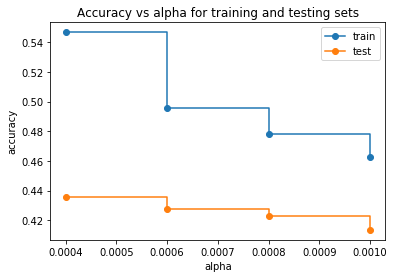

In [0]:
train_scores = [clf.score(X_train, y_train) for clf in clfspec]
test_scores = [clf.score(X_test, y_test) for clf in clfspec]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(spacing, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(spacing, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [0]:
alpha = 0.00034658875909313047

optmodel = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha, criterion=criterion)
optmodel.fit(X_train, y_train)

depthmodel = DecisionTreeClassifier(random_state=0, max_depth=optmodel.get_depth(), criterion=criterion)
depthmodel.fit(X_train, y_train)

models = [optmodel, depthmodel]

train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

print("opt train score = ", train_scores[0])
print("depth train score = ", train_scores[1])
print("opt test score = ", test_scores[0])
print("depth test score = ", test_scores[1])


opt train score =  0.5700017677214071
depth train score =  0.8380767191090684
opt test score =  0.4314922995220393
depth test score =  0.39577801380775357


In [3]:
alpha = 0.00034658875909313047

optmodel = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
optmodel.fit(X_train, y_train)

print(optmodel.get_depth())

144


results from the naive model using default parameters 

In [4]:
optmodel = DecisionTreeClassifier(random_state=0)
optmodel.fit(X_train, y_train)
print(optmodel.score(X_test, y_test))
print(optmodel.get_depth())

0.40135422198619225
374


results from the naive model using entropy

In [6]:
optmodel = DecisionTreeClassifier(random_state=0, criterion='entropy')
optmodel.fit(X_train, y_train)
print(optmodel.score(X_test, y_test))
print(optmodel.get_depth())

0.2704460966542751
126
